# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data

# Finding the table in the BeautifulSoup object
table = soup.find('table', class_='table')

# Extracting all rows of data
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_data = []

# Finding all the rows in the table with the class 'data-row'
rows = soup.find_all('tr', class_='data-row')

# Loop through the scraped data to create a list of rows
for row in rows:
    # Getting all <td> elements in rows
    columns = row.find_all('td')
    
    # Extracting the text from each <td> element and storing it in a list
    row_data = [col.text for col in columns]
    
    # Appending
    mars_data.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# DataFrame Definition
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_dataframe = pd.DataFrame(mars_data, columns=columns)

In [8]:
# Confirm DataFrame was created successfully
mars_dataframe.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(mars_dataframe.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis

# Converting terrestrial_date to datetime
mars_dataframe['terrestrial_date'] = pd.to_datetime(mars_dataframe['terrestrial_date'])

# Maintaining ID as object type
mars_dataframe['id'] = mars_dataframe['id'].astype(str)

# Converting sol, ls, month to int32
mars_dataframe['sol'] = mars_dataframe['sol'].astype('int32')
mars_dataframe['ls'] = mars_dataframe['ls'].astype('int32')
mars_dataframe['month'] = mars_dataframe['month'].astype('int32')

# Converting min_temp and pressure to float64
mars_dataframe['min_temp'] = mars_dataframe['min_temp'].astype('float64')
mars_dataframe['pressure'] = mars_dataframe['pressure'].astype('float64')

In [11]:
# Confirm type changes were successful by examining data types again
print(mars_dataframe.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
months_in_mars_dataframe = mars_dataframe['month'].nunique()
months_in_mars_dataframe

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
sols_in_mars_dataframe = mars_dataframe['sol'].nunique()
sols_in_mars_dataframe

1867

In [14]:
# 3. What is the average minimum temperature by month?
avg_min_monthly_temp = mars_dataframe.groupby('month')['min_temp'].mean()
avg_min_monthly_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

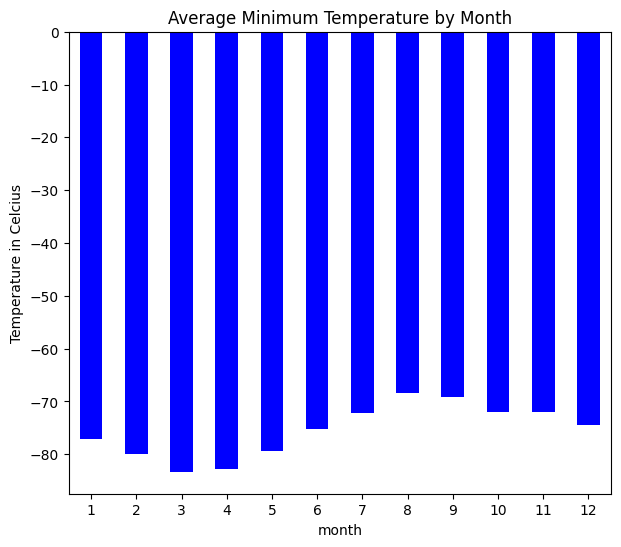

In [15]:
# Plot the average minimum temperature by month

# Calculating the average minimum temperature by month
avg_min_temp_by_month = mars_dataframe.groupby('month')['min_temp'].mean()

# Plotting the average minimum temperatures by month
plt.figure(figsize=(7, 6))  # Set the size of the figure
avg_min_temp_by_month.plot(kind='bar', color='blue')  # Create a bar chart

# Adding title and labels
plt.title('Average Minimum Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celcius')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

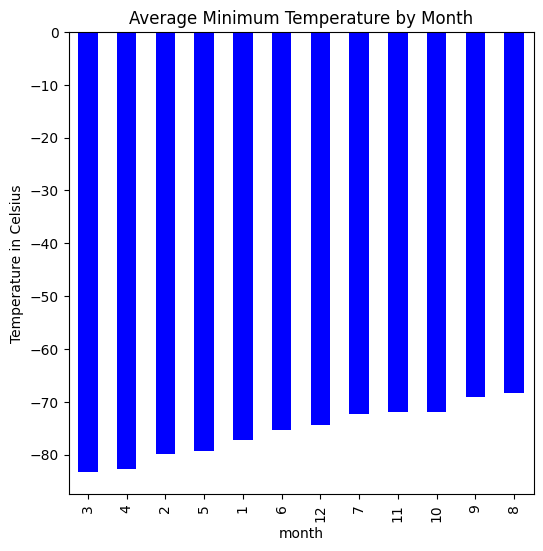

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sorting the average minimum temperatures in descending order
avg_min_temp_by_month_sorted = avg_min_temp_by_month.sort_values(ascending=True)

# Plotting the average minimum temperatures by month
plt.figure(figsize=(6, 6))  # Set the size of the figure
avg_min_temp_by_month_sorted.plot(kind='bar', color='blue')  # Create a bar chart

# Adding title and labels
plt.title('Average Minimum Temperature by Month')
plt.xlabel('month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

In [18]:
# 4. What is the average pressure by month?
avg_monthly_pressure = mars_dataframe.groupby('month')['pressure'].mean()
avg_monthly_pressure 

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

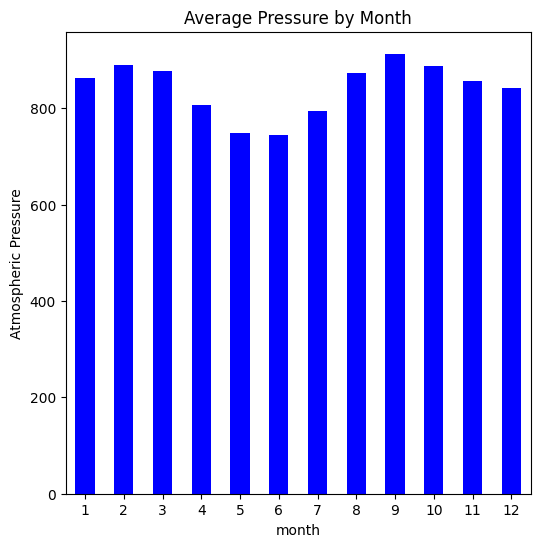

In [19]:
# Plot the average pressure by month
plt.figure(figsize=(6, 6))  # Set the size of the figure
avg_monthly_pressure.plot(kind='bar', color='blue')  # Create a bar chart

# Adding title and labels
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

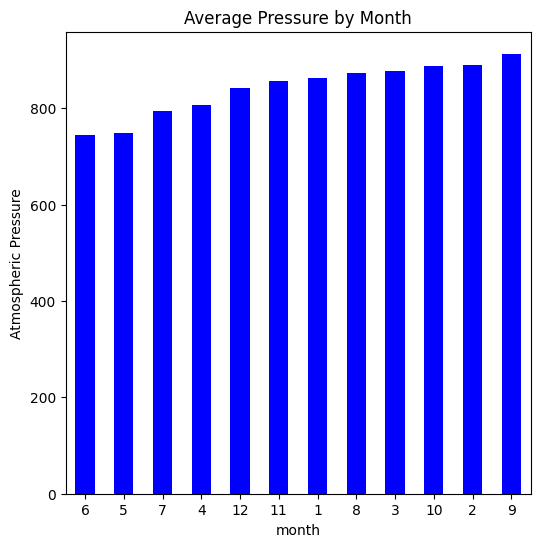

In [20]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_avg_monthly_pressure = avg_monthly_pressure.sort_values(ascending=True)

plt.figure(figsize=(6, 6))  # Set the size of the figure
sorted_avg_monthly_pressure.plot(kind='bar', color='blue')  # Create a bar chart

# Adding title and labels
plt.title('Average Pressure by Month')
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()

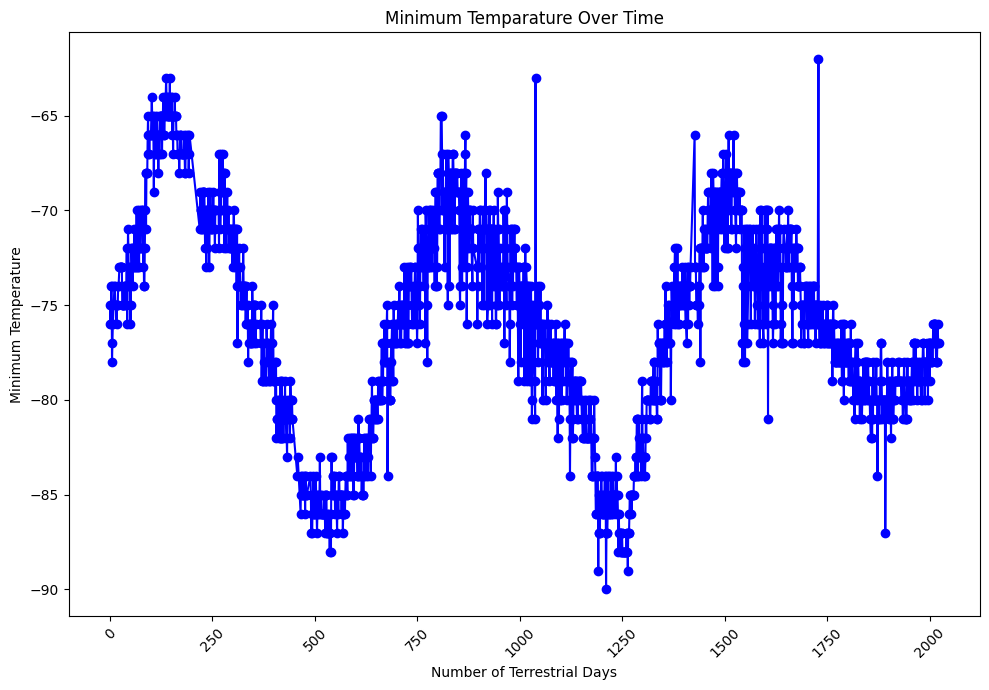

In [22]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Creating a new column for Earth days
mars_dataframe['earth_day_count'] = (mars_dataframe['terrestrial_date'] - mars_dataframe['terrestrial_date'].min()).dt.days

# Plotting daily minimum temperatures against Earth day count
plt.figure(figsize=(10, 7))  # Set the size of the figure
plt.plot(mars_dataframe['earth_day_count'], mars_dataframe['min_temp'], marker='o', linestyle='-', color='blue')

# Adding title and labels
plt.title('Minimum Temparature Over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Showing the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

#### Minimum Temperature

The Curiosity rover's measurements of Mars' minimum temperatures paint a picture of a consistently frigid environment. Throughout the Martian year, temperatures never rose above zero degrees Fahrenheit. The coldest month, the third, saw average minimum temperatures plummet to around -80°F, marking the most severe period. In contrast, the eighth month offered a relative respite, with temperatures reaching a high of about -70°F. While this represents a modest temperature variation of approximately 10°F, Mars remains a bitterly cold planet throughout the year.

These findings underscore the challenges of operating on the Martian surface. The relatively warmer months, such as the eighth, might offer more favorable conditions for energy-intensive tasks or scientific experiments. A thorough understanding of Mars' temperature patterns is essential for planning future exploration missions and ensuring the durability of equipment designed to withstand the planet's extreme cold.

#### Atmospheric Pressure

The findings on atmospheric pressure reveal a fascinating pattern in Mars' atmospheric pressure. As the Martian year progresses, the pressure steadily rises across months 7 (approximately 800 mb), 4, 12, 11, 1, 8, 3, 10, and 2, peaking in month 9 (over 800 mb). The sixth month sees the lowest pressure, while the ninth boasts the highest. This cyclical pattern suggests that Mars experiences significant seasonal changes, likely driven by climatic factors or variations in atmospheric composition. Understanding these pressure shifts is crucial for future missions and exploring the potential for life on the Red Planet.

To delve deeper, researchers could explore the connection between these pressure changes and temperature variations. Investigating the underlying causes of these fluctuations could provide valuable insights into Martian weather systems and their impact on the planet's environment.


#### Year Length

The findings on Mars' minimum temparature over time reveal a clear pattern of temperature fluctuations on Mars, suggesting the planet experiences distinct seasons. By studying the regular cycles of warming and cooling, we can determine the length of a Martian year.

Each complete cycle of temperature changes takes approximately 667 Earth days. This aligns perfectly with the known length of a Martian year. Therefore, a Martian year is roughly equivalent to 667 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
mars_dataframe.to_csv('mars_weather_data.csv', index=False)

In [24]:
browser.quit()